In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
plt.style.use('seaborn-white')
pd.set_option('display.float_format',lambda x: '%.3f' % x)

In [ ]:
df = pd.read_csv('train.csv',nrows=5_000_000,parse_dates=['pickup_datetime']).drop(columns='key')

In [9]:
taxi = df.copy()

In [10]:
print("The dataset is {} taxi rides".format(len(taxi)))

The dataset is 5000000 taxi rides


In [11]:
taxi.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.500,2009-06-15 17:26:21,-73.844,40.721,-73.842,40.712,1
1,16.900,2010-01-05 16:52:16,-74.016,40.711,-73.979,40.782,1
2,5.700,2011-08-18 00:35:00,-73.983,40.761,-73.991,40.751,2
3,7.700,2012-04-21 04:30:42,-73.987,40.733,-73.992,40.758,1
4,5.300,2010-03-09 07:51:00,-73.968,40.768,-73.957,40.784,1


In [12]:
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5000000.000,5000000.000,5000000.000,4999964.000,4999964.000,5000000.000
mean,11.341,-72.507,39.920,-72.507,39.917,1.685
std,9.820,12.810,8.964,12.848,9.487,1.332
min,-100.000,-3426.609,-3488.080,-3412.653,-3488.080,0.000
25%,6.000,-73.992,40.735,-73.991,40.734,1.000
50%,8.500,-73.982,40.753,-73.980,40.753,1.000
75%,12.500,-73.967,40.767,-73.964,40.768,2.000
max,1273.310,3439.426,3310.364,3457.622,3345.917,208.000


In [13]:
taxi = taxi.query('pickup_longitude>-78 & pickup_longitude<-70 & dropoff_longitude>-78 &\
dropoff_longitude<-70 & pickup_latitude>37 & pickup_latitude<45 & dropoff_latitude>37 &\
dropoff_latitude<45 & passenger_count>0 & fare_amount>=2.5')


In [14]:
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,4878498.000,4878498.000,4878498.000,4878498.000,4878498.000,4878498.000
mean,11.333,-73.975,40.751,-73.974,40.751,1.690
std,9.727,0.043,0.034,0.042,0.037,1.314
min,2.500,-77.902,37.031,-77.971,37.031,1.000
25%,6.000,-73.992,40.737,-73.992,40.736,1.000
50%,8.500,-73.982,40.753,-73.981,40.754,1.000
75%,12.500,-73.968,40.768,-73.965,40.768,2.000
max,952.000,-70.000,44.732,-70.002,44.728,208.000


### EDA

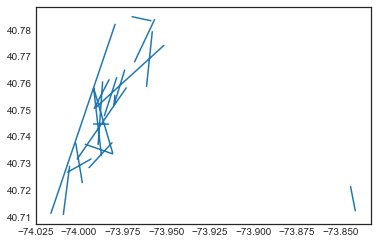

In [19]:
import seaborn as sns
def showrides(df,numlines):
    lats = []
    lons = []
    goodrows = df[df['pickup_longitude']<-70] 
    for iter, row in goodrows[:numlines].iterrows():
        lons.append(row['pickup_longitude'])
        lons.append(row['dropoff_longitude'])
        lons.append(None)
        lats.append(row['pickup_latitude'])
        lats.append(row['dropoff_latitude'])
        lats.append(None)
    plt.plot(lons,lats)

showrides(taxi,20)

#### Fare amount

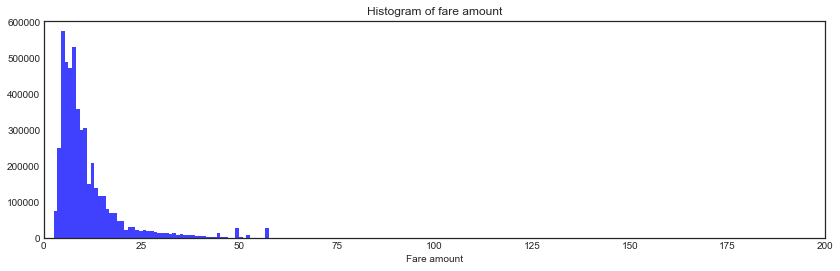

In [20]:
plt.figure(figsize=(14,4))
n, bins, patches = plt.hist(taxi.fare_amount,1000,facecolor='blue',alpha=0.75)
plt.xlabel('Fare amount')
plt.title('Histogram of fare amount')
plt.xlim(0,200)
plt.show();

The histogram of fare amount shows that most fare amount are small.

In [21]:
taxi.groupby('fare_amount').size().nlargest(10)

fare_amount
6.500     237317
4.500     200433
8.500     183203
5.700     142304
5.300     142293
6.100     138084
4.900     138049
6.900     127239
10.500    124046
7.300     119606
dtype: int64

Interesting, the most common fare amount are very small at only 6.5 and 4.5, which means they are very short rides.

#### Passenger count

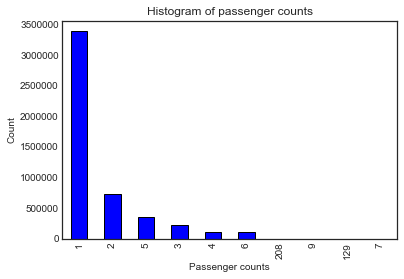

In [22]:
taxi['passenger_count'].value_counts().plot.bar(color='b',edgecolor='k');
plt.title('Histogram of passenger counts');
plt.xlabel('Passenger counts');
plt.ylabel('Count');

In [23]:
taxi.groupby('passenger_count').size()

passenger_count
1      3386066
2       723885
3       214918
4       103907
5       346169
6       103547
7            1
9            2
129          1
208          2
dtype: int64

Based on the above discovery, we are going to remove taxi rides with passenger_count > 6.

In [24]:
taxi = taxi.loc[taxi['passenger_count']<=6]

In [25]:
taxi.groupby('passenger_count').size()

passenger_count
1    3386066
2     723885
3     214918
4     103907
5     346169
6     103547
dtype: int64

In [26]:
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,4878492.000,4878492.000,4878492.000,4878492.000,4878492.000,4878492.000
mean,11.333,-73.975,40.751,-73.974,40.751,1.690
std,9.727,0.043,0.034,0.042,0.037,1.306
min,2.500,-77.902,37.031,-77.971,37.031,1.000
25%,6.000,-73.992,40.737,-73.992,40.736,1.000
50%,8.500,-73.982,40.753,-73.981,40.754,1.000
75%,12.500,-73.968,40.768,-73.965,40.768,2.000
max,952.000,-70.000,44.732,-70.002,44.728,6.000


To be quick, let's create a baseline model, without Machine learning, just a simple rate calculation


In [27]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(taxi,test_size=0.3,random_state=42)

In [28]:
import numpy as np
import shutil

def distance_between(lat1,lon1,lat2,lon2):
    # Haversine formula to compute distance
    dist = np.degrees(np.arccos(np.sin(np.radians(lat1)) * np.sin(np.radians(lat2)) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.cos(np.radians(lon2 - lon1)))) * 60 * 1.515 * 1.609344
    return dist

def estimate_distance(df):
    return distance_between(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

def compute_rmse(actual,predicted):
    return np.sqrt(np.mean((actual - predicted)**2))

def print_rmse(df,rate,name):
    print("{1} RMSE = {0}".format(compute_rmse(df['fare_amount'],rate*estimate_distance(df)), name))


In [29]:
rate = train['fare_amount'].mean() / estimate_distance(train).mean()

print("Rate = ${0}/km".format(rate))
print_rmse(train,rate,'Train')
print_rmse(test,rate,'Test')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  


Rate = $2.5659773586888486/km
Train RMSE = 9.83415299897351
Test RMSE = 10.071901311965668


This baseline model gets us RMSE for test set at $9.91. We expect ML achieve better than this.

### Feature engineering

1). Extract information from datetime (day of week, month, hour, day). Taxi fares change day/night or on weekdays/holidays.

2). The distance from pickup to dropoff. The longer the trip, the higher the price.

3). Add columns indicating distance from pickup or dropoff coordinates to JFK. Trips from/to JFK have a flat fare at $52.

Getting distance between two points based on latitude and longitude using haversine formula. https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas/29546836#29546836

In [30]:
taxi['year'] = taxi.pickup_datetime.dt.year
taxi['month'] = taxi.pickup_datetime.dt.month
taxi['day'] = taxi.pickup_datetime.dt.day
taxi['weekday'] = taxi.pickup_datetime.dt.weekday
taxi['hour'] = taxi.pickup_datetime.dt.hour

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [31]:
taxi.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour
0,4.500,2009-06-15 17:26:21,-73.844,40.721,-73.842,40.712,1,2009,6,15,0,17
1,16.900,2010-01-05 16:52:16,-74.016,40.711,-73.979,40.782,1,2010,1,5,1,16
2,5.700,2011-08-18 00:35:00,-73.983,40.761,-73.991,40.751,2,2011,8,18,3,0
3,7.700,2012-04-21 04:30:42,-73.987,40.733,-73.992,40.758,1,2012,4,21,5,4
4,5.300,2010-03-09 07:51:00,-73.968,40.768,-73.957,40.784,1,2010,3,9,1,7


In [33]:
from math import radians, cos, sin, asin, sqrt
import numpy as np

def haversine_np(lon1,lat1,lon2,lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians,[lon1,lat1,lon2,lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c # 6371 is Radius of earth in kilometers. Use 3956 for miles
    return km

taxi['distance'] = haversine_np(taxi['pickup_latitude'],taxi['pickup_longitude'],taxi['dropoff_latitude'],taxi['dropoff_longitude'])

In [34]:
taxi.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance
0,4.500,2009-06-15 17:26:21,-73.844,40.721,-73.842,40.712,1,2009,6,15,0,17,0.410
1,16.900,2010-01-05 16:52:16,-74.016,40.711,-73.979,40.782,1,2010,1,5,1,16,4.629
2,5.700,2011-08-18 00:35:00,-73.983,40.761,-73.991,40.751,2,2011,8,18,3,0,1.001
3,7.700,2012-04-21 04:30:42,-73.987,40.733,-73.992,40.758,1,2012,4,21,5,4,0.910
4,5.300,2010-03-09 07:51:00,-73.968,40.768,-73.957,40.784,1,2010,3,9,1,7,1.361


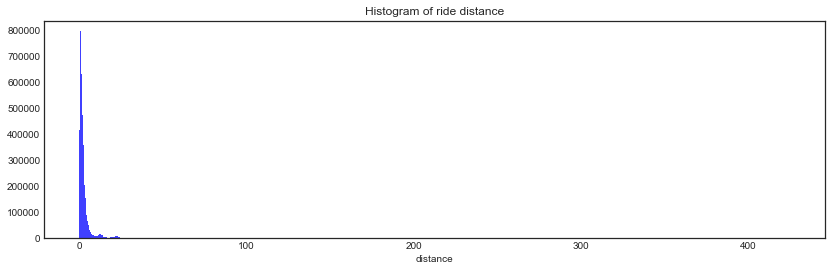

In [35]:
plt.figure(figsize=(14,4))
n, bins, patches = plt.hist(taxi.distance,1000,facecolor='blue',alpha=0.75)
plt.xlabel('distance')
plt.title('Histogram of ride distance')
plt.show();

In [36]:
taxi['distance'].describe()

count   4878492.000
mean          2.724
std           4.275
min           0.000
25%           0.853
50%           1.552
75%           2.831
max         424.674
Name: distance, dtype: float64

The minimum distance is 0, we will remove all 0 distance.

In [37]:
taxi = taxi.query('distance>0')

Official NYC yellow taxis have a flat rate fee from JFK to Manhattan for $52 (plus tolls and tip), Add columns indicating distance from pickup or dropoff coordinates to JFK.

In [39]:
JFK_coord = (40.6413, -73.7781)
pickup_JFK = haversine_np(taxi['pickup_latitude'], taxi['pickup_longitude'], JFK_coord[0], JFK_coord[1]) 
dropoff_JFK = haversine_np(JFK_coord[0], JFK_coord[1], taxi['dropoff_latitude'], taxi['dropoff_longitude'])

In [40]:
taxi['JFK_distance'] = pd.concat([pickup_JFK,dropoff_JFK],axis=1).min(axis=1)

In [41]:
taxi['JFK_distance'].describe()

count   4826440.000
mean         21.001
std           4.558
min           0.021
25%          20.274
50%          22.062
75%          23.150
max         455.905
Name: JFK_distance, dtype: float64

In [42]:
taxi.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance,JFK_distance
0,4.500,2009-06-15 17:26:21,-73.844,40.721,-73.842,40.712,1,2009,6,15,0,17,0.410,7.397
1,16.900,2010-01-05 16:52:16,-74.016,40.711,-73.979,40.782,1,2010,1,5,1,16,4.629,22.787
2,5.700,2011-08-18 00:35:00,-73.983,40.761,-73.991,40.751,2,2011,8,18,3,0,1.001,23.054
3,7.700,2012-04-21 04:30:42,-73.987,40.733,-73.992,40.758,1,2012,4,21,5,4,0.910,23.415
4,5.300,2010-03-09 07:51:00,-73.968,40.768,-73.957,40.784,1,2010,3,9,1,7,1.361,20.336


In [43]:
del taxi['pickup_datetime']

In [44]:
from sklearn.model_selection import train_test_split
y = taxi['fare_amount']
X = taxi.drop(columns=['fare_amount'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error

print("Test RMSE: %.3f" % mean_squared_error(y_test,y_pred)**0.5)


Test RMSE: 6.018


### Random Forest Regression

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2,random_state=0,n_estimators=100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Test RMSE: %.3f" % mean_squared_error(y_test,y_pred) ** 0.5)

Test RMSE: 5.665


### LightGBM

In [48]:
import lightgbm as lgb

params = {
    'learning_rate':0.75,
    'application': 'regression',
    'max_depth': 3,
    'num_leaves':100,
    'verbosity':-1,
    'metric': 'RMSE',
}

/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [49]:
train_set = lgb.Dataset(X_train,y_train,silent=True)

In [50]:
lb = lgb.train(params,train_set=train_set,num_boost_round=300)

In [51]:
y_pred = lb.predict(X_test,num_iteration=lb.best_iteration)

In [64]:
print("Test RMSE: %.3f" % mean_squared_error(y_test,y_pred)**0.5)

Test RMSE: 3.729


### A Baseline Regression Model with Keras

In [67]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [69]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(12,input_dim=12,kernel_initializer='normal',activation='relu'))
    model.add(Dense(1,kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model


In [70]:
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model,nb_epoch=100,batch_size=5,verbose=0)


In [71]:
kfold = KFold(n_splits=10,random_state=seed)
results = cross_val_score(estimator,X.values,y.values,cv=kfold,n_jobs=1)
print("Results: %.2f (%.2f) MSE" % (results.mean(),results.std()))

Results: -29.42 (1.45) MSE


In [72]:
print("RMSE:", np.sqrt(results.std()))

RMSE: 1.2045700183191932
